In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

from scipy.optimize import least_squares
from matplotlib.lines import Line2D


In [219]:
#get files in directory
experiment_directory = 'RAW_DATA'
specimen_folders = os.listdir('./'+experiment_directory)
specimen_folders = specimen_folders[1:]

GLASS_CO_TEST = []

glass_co_path = os.path.join('./',experiment_directory,specimen_folders[0])
for specimen_file in glob.glob(glass_co_path+"/*.csv"):
    co_test_data = open(specimen_file)
    #co_test_data_header = co_test_data.readline().split('\"')[-2].split('-')
    extract_header = co_test_data.readlines()[0:15]
    
    test_type = extract_header[6].split(',')[-1].strip()
    area = float(extract_header[7].split(',')[-2][1:-2])/1000/1000
    height = float(extract_header[8].split(',')[-2][1:-2])
    label = extract_header[9].split(',')[-1].split('\"')[1].split(' ')[1]
    
    co_test_data.close()
    co_test_data = open(specimen_file)
    
    co_test_data = pd.read_csv(co_test_data,header=16)
    co_test_data = co_test_data.drop([0])
    co_test_data = co_test_data.astype("float64")
    
    co_test_data['Stress'] = co_test_data['Load']/area/1e6
    co_test_data['Strain'] = co_test_data['Extension']/height
    co_test_data['Label'] = label
    co_test_data['Type'] = test_type
    GLASS_CO_TEST.append(co_test_data)
    
GLASS_CO_TEST = pd.concat(GLASS_CO_TEST)


#specimen_files = os.listdir()
#print(specimen_files)

1.8154588416353229e-09
6.3587108861037525 12.93241855893602 0.0013072819560379257


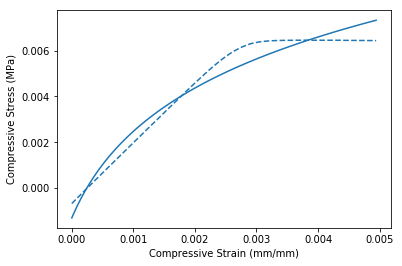

In [257]:
relden = 0.008
GLASS_COMP_TEST = GLASS_CO_TEST[GLASS_CO_TEST['Label'] =='004']
GLASS_COMP_TEST = GLASS_COMP_TEST[GLASS_COMP_TEST['Type'] =='Break']
GLASS_COMP_TEST = GLASS_COMP_TEST[GLASS_COMP_TEST['Strain']>-0.005]

A,B,C = fit_modified_CB(-GLASS_COMP_TEST['Strain'],-GLASS_COMP_TEST['Stress'])
print(A,B,C)

plt.xlabel("Compressive Strain (mm/mm)")
plt.ylabel("Compressive Stress (MPa)")
l=plt.plot(-GLASS_COMP_TEST['Strain'],-GLASS_COMP_TEST['Stress'],'--')
plt.plot(-GLASS_COMP_TEST['Strain'], A*relden/B*np.log(1+B/relden*-GLASS_COMP_TEST['Strain'])-C,c=l[0].get_color())
plt.show()

In [285]:
reldens = [0.15,0.1,0.075,0.05]
CO_TEST = []
for i,specimen_folder in enumerate(specimen_folders[2:]):
    specimen_folder = os.path.join('./',experiment_directory,specimen_folder)
    #print(glob.glob(specimen_folder+"/*.csv"))
    for specimen_file in glob.glob(specimen_folder+"/*.csv"):
        co_test_data = open(specimen_file)
        specimen_header = co_test_data.readlines()[0:10]
        co_test_data_header = specimen_header[0].split('\"')[-2].split('-')
        #print(specimen_file,co_test_data_header)
        #print(specimen_header[0])
        co_test_data.close()
        co_test_data = open(specimen_file)
        co_test_data = pd.read_csv(co_test_data,header=11)
        co_test_data = co_test_data.drop([0])
        co_test_data = co_test_data.astype("float64")
        
        co_test_data['Relative Density']= reldens[i]
        co_test_data['Label'] = co_test_data_header[0].strip()
        co_test_data['Type'] = co_test_data_header[1].strip()
        CO_TEST.append(co_test_data)
CO_TEST = pd.concat(CO_TEST)

Time  Extension  Compressive extension        Load  Cycle count  \
1     0.000    0.00000                0.00000     3.37775          0.0   
2     0.100    0.00122                0.00122     3.76973          0.0   
3     0.200    0.00386                0.00386     4.43718          0.0   
4     0.300    0.01261                0.01261     7.27299          0.0   
5     0.400    0.02011                0.02011    10.17843          0.0   
6     0.500    0.02637                0.02637    12.35921          0.0   
7     0.600    0.03290                0.03290    15.38813          0.0   
8     0.700    0.03932                0.03932    19.14516          0.0   
9     0.800    0.04591                0.04591    23.31607          0.0   
10    0.900    0.05230                0.05230    28.26505          0.0   
11    1.000    0.05876                0.05876    33.30080          0.0   
12    1.100    0.06530                0.06530    40.01846          0.0   
13    1.200    0.07143                0.07143    46.43806          0.0   
14    1.300    0.07765                0.07765    53.38734          0.0   
15    1.400    0.08399                0.08399    61.18588          0.0   
16    1.500    0.09066                0.09066    70.40704          0.0   
17    1.600    0.09701                0.09701    80.06612          0.0   
18    1.700    0.10319                0.10319    90.39455          0.0   
19    1.800    0.10994                0.10994   103.24977          0.0   
20    1.900    0.11643                0.11643   116.91740          0.0   
21    2.000    0.12277                0.12277   131.35300          0.0   
22    2.100    0.12899                0.12899   145.96086          0.0   
23    2.200    0.13561                0.13561   162.68092          0.0   
24    2.300    0.14237                0.14237   180.33835          0.0   
25    2.400    0.14860                0.14860   197.39417          0.0   
26    2.500    0.15481                0.15481   213.97595          0.0   
27    2.600    0.16148                0.16148   232.34596          0.0   
28    2.700    0.16777                0.16777   249.46326          0.0   
29    2.800    0.17393                0.17393   266.23260          0.0   
30    2.900    0.18022                0.18022   283.31381          0.0   
..      ...        ...                    ...         ...          ...   
181  18.000    2.03301                2.03301  1474.33862          0.0   
182  18.100    2.04441                2.04441  1481.02637          0.0   
183  18.200    2.05612                2.05612  1488.17212          0.0   
184  18.300    2.06701                2.06701  1494.44263          0.0   
185  18.400    2.07818                2.07818  1500.90039          0.0   
186  18.500    2.08950                2.08950  1507.64905          0.0   
187  18.600    2.10097                2.10097  1514.30176          0.0   
188  18.700    2.11244                2.11244  1521.15210          0.0   
189  18.800    2.12368                2.12368  1527.48730          0.0   
190  18.900    2.13532                2.13532  1534.32874          0.0   
191  19.000    2.14674                2.14674  1541.00793          0.0   
192  19.100    2.15832                2.15832  1547.72791          0.0   
193  19.200    2.16905                2.16905  1553.56921          0.0   
194  19.300    2.18032                2.18032  1559.86194          0.0   
195  19.400    2.19158                2.19158  1566.09021          0.0   
196  19.500    2.20346                2.20346  1573.03064          0.0   
197  19.600    2.21428                2.21428  1578.83704          0.0   
198  19.700    2.22604                2.22604  1585.15906          0.0   
199  19.800    2.23761                2.23761  1578.94775          0.0   
200  19.900    2.24908                2.24908  1585.24976          0.0   
201  20.000    2.26009                2.26009  1590.57300          0.0   
202  20.100    2.27123                2.27123  1596.28577          0.0   
203  20.200

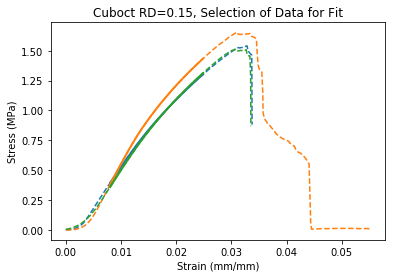

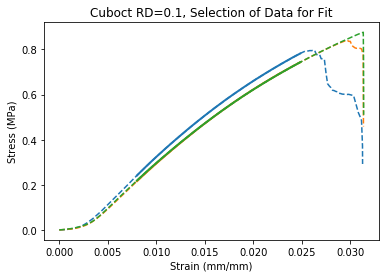

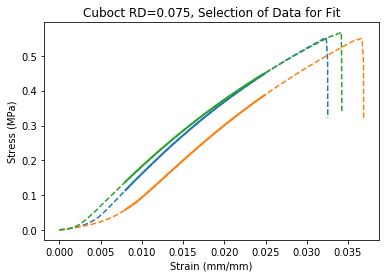

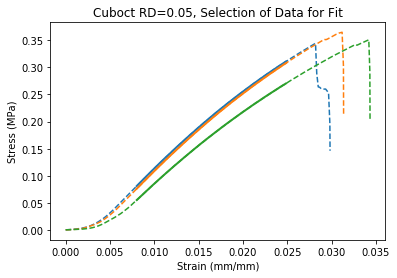

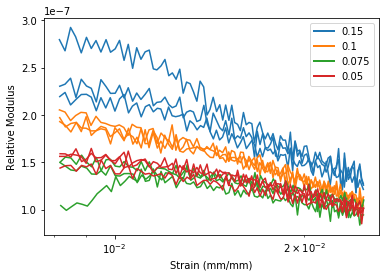

In [348]:
for relden in reldens:
    CO_FIT = CO_TEST[(CO_TEST["Compressive strain (Extension)"] > 0.008) & 
                     (CO_TEST["Compressive strain (Extension)"] < 0.025)]
    CO_FIT = CO_FIT[CO_FIT["Relative Density"]==relden]

    
    for label in ['A','B','C']:
        l = plt.plot(CO_TEST[(CO_TEST.Label==label)&(CO_TEST.Type=='Break')&(CO_TEST['Relative Density']==relden)]["Compressive strain (Extension)"].values,
                 CO_TEST[(CO_TEST.Label==label)&(CO_TEST.Type=='Break')&(CO_TEST['Relative Density']==relden)]["Compressive stress"].values,'--')
        plt.plot(CO_FIT[(CO_FIT.Label==label)&(CO_FIT.Type=='Break')]["Compressive strain (Extension)"].values,
                 CO_FIT[(CO_FIT.Label==label)&(CO_FIT.Type=='Break')]["Compressive stress"].values,
                 c=l[0].get_color(),
                 linewidth=2)
    
    plt.xlabel("Strain (mm/mm)")
    plt.ylabel("Stress (MPa)")
    plt.title("Cuboct RD={0}, Selection of Data for Fit".format(relden))
    plt.show()


colors = ['r','g','b','k']
custom_lines = []

for i,relden in enumerate(reldens):
    CO_FIT = CO_TEST[(CO_TEST["Compressive strain (Extension)"] > 0.008) & 
                     (CO_TEST["Compressive strain (Extension)"] < 0.025)]
    CO_FIT = CO_FIT[CO_FIT["Relative Density"]==relden]
    T_CO_FIT = CO_FIT[["Compressive stress","Compressive strain (Extension)"]]
    CO_FIT["Modulus"]= T_CO_FIT.diff()["Compressive stress"]/T_CO_FIT.diff()["Compressive strain (Extension)"]
    
    l= plt.plot(CO_FIT[(CO_FIT.Label=='A')&(CO_FIT.Type=='Break')]["Compressive strain (Extension)"].iloc[1:],
                 CO_FIT[(CO_FIT.Label=='A')&(CO_FIT.Type=='Break')]["Modulus"].iloc[1:]/2.1e9/relden)
    custom_lines.append(Line2D([0], [0], color=l[0].get_color(), lw=2))
    for label in ['B','C']:
        plt.plot(CO_FIT[(CO_FIT.Label==label)&(CO_FIT.Type=='Break')]["Compressive strain (Extension)"].iloc[1:],
                 CO_FIT[(CO_FIT.Label==label)&(CO_FIT.Type=='Break')]["Modulus"].iloc[1:]/2.1e9/relden,
                c=l[0].get_color())
plt.xlabel("Strain (mm/mm)")
plt.ylabel("Relative Modulus")
plt.legend(custom_lines, reldens)

plt.xscale('Log')
plt.show()

/Users/dcellucc/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


898.9281349383663 14.199286279942964 0.4219192654967309
2385.6246636133005 45.79523651729037 1.0880181106954816
1015.2706012237351 15.989283868638548 0.5371855122217195
827.9166681643136 9.935385379121849 0.25283652063160333
741.2982445031586 8.547595802039103 0.24312131396431802
708.1146267626003 7.982667204236859 0.22538291815536637
508.2621551499968 4.290455921507964 0.14081665341840213
390.082838141356 2.0343243881187845 0.16779263710255807
452.09541201973093 3.911868921027091 0.09059332268915254
509.85479044847403 2.7000396814617855 0.09074821559217545
505.6063772168513 2.600693109319554 0.09525480596932608
453.366115049688 2.4131592006364624 0.09978467567494442


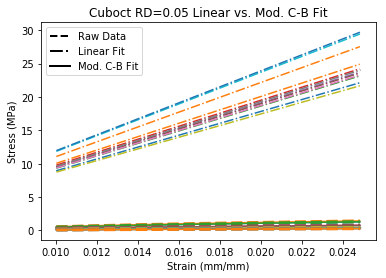

[[8.98928135e+02 1.41992863e+01 4.21919265e-01]
 [2.38562466e+03 4.57952365e+01 1.08801811e+00]
 [1.01527060e+03 1.59892839e+01 5.37185512e-01]
 [8.27916668e+02 9.93538538e+00 2.52836521e-01]
 [7.41298245e+02 8.54759580e+00 2.43121314e-01]
 [7.08114627e+02 7.98266720e+00 2.25382918e-01]
 [5.08262155e+02 4.29045592e+00 1.40816653e-01]
 [3.90082838e+02 2.03432439e+00 1.67792637e-01]
 [4.52095412e+02 3.91186892e+00 9.05933227e-02]
 [5.09854790e+02 2.70003968e+00 9.07482156e-02]
 [5.05606377e+02 2.60069311e+00 9.52548060e-02]
 [4.53366115e+02 2.41315920e+00 9.97846757e-02]]


In [306]:
relden = 0.05

def fit_modified_CB(strains,stresses):
    optimize_func = lambda x: x[0]*relden*relden/x[1]*np.log(1+x[1]/relden*strains)-x[2]-stresses    
    A_0 = 5
    B_0 = 1
    C_0 = 0.1
    mod_CB_fit =  least_squares(optimize_func, [A_0,B_0,C_0])
    #print(mod_CB_fit.optimality)
    return mod_CB_fit.x

def fit_linear_CB(strains,stresses):
    optimize_func = lambda x: x[0]*np.power(relden,1.5)*strains-x[1]-stresses    
    A_0 = 5
    B_0 = 0.05
    mod_CB_fit =  least_squares(optimize_func, [A_0,B_0])
    #print(mod_CB_fit.optimality)
    return mod_CB_fit.x

coeffs = []
for relden in reldens:
    #print("=======\nRELDEN: {0}\n=======".format(relden))
    CO_FIT = CO_TEST[(CO_TEST['Relative Density']==relden)&
                     (CO_TEST['Compressive strain (Extension)'] > 0.01)&
                     (CO_TEST['Compressive strain (Extension)'] < 0.025)]
    for label in ['A','B','C']:
        strains = CO_FIT[(CO_FIT.Label==label)&(CO_FIT.Type=='Break')]["Compressive strain (Extension)"].values
        stresses = CO_FIT[(CO_FIT.Label==label)&(CO_FIT.Type=='Break')]["Compressive stress"].values
        A,B,C = fit_modified_CB(strains,
                                stresses)
        D,E = fit_linear_CB(strains,stresses)
        coeffs.append([A,B,C])
        print(A,B,C)
        l = plt.plot(strains,stresses,'--',linewidth=3)
        plt.plot(strains, A*relden*relden/B*np.log(1+B/relden*strains)-C,c=l[0].get_color())
        plt.plot(strains, D*strains-E,'-.',c=l[0].get_color())

custom_lines = [Line2D([0], [0], color='k', lw=2,linestyle='--'),
                Line2D([0], [0], color='k', lw=2,linestyle='-.'),
                Line2D([0], [0], color='k', lw=2)]

plt.legend(custom_lines, ['Raw Data', 'Linear Fit', 'Mod. C-B Fit'])

plt.title("Cuboct RD=0.05 Linear vs. Mod. C-B Fit")
plt.xlabel("Strain (mm/mm)")
plt.ylabel("Stress (MPa)")    
plt.show()

coeffs = np.array(coeffs)

print(coeffs)


#psch_coeff.append([K,Q,B])

#l = plt.plot(psch_strains,psch_values,'.')
#plt.plot(psch_strains,(K)/(1+Q/psch_reldens[i]*np.power(psch_strains,B)),c=l[0].get_color())